In [14]:
pip uninstall -y torch torchvision torchaudio


Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [1]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
import torch
import torchvision

print(torch.__version__)  # Should match the installed version (e.g., 2.1.0+cu118)
print(torchvision.__version__)  # Should be compatible (e.g., 0.16.0+cu118)
print(torch.cuda.is_available())  # Should return True if GPU is available


2.7.0+cu118
0.22.0+cu118
False


In [1]:
!pip uninstall -y torchvision torchaudio # Uninstall existing torchvision and torchaudio
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 # Reinstall torchvision and torchaudio matching PyTorch CUDA version

Found existing installation: torchvision 0.22.0+cu118
Uninstalling torchvision-0.22.0+cu118:
  Successfully uninstalled torchvision-0.22.0+cu118
Found existing installation: torchaudio 2.7.0+cu118
Uninstalling torchaudio-2.7.0+cu118:
  Successfully uninstalled torchaudio-2.7.0+cu118
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.0%2Bcu118-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.0%2Bcu118-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.6 kB)
Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.0%2Bcu118-cp311-cp311-manylinux_2_28_x86_64.whl (6.7 MB)
Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.0%2Bcu118-cp311-cp311-manylinux_2_28_x86_64.whl (3.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source

In [2]:
from IPython import get_ipython
from IPython.display import display
# %%
!pip uninstall -y torchvision
!pip install torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# %%
!pip uninstall -y segmentation-models keras tensorflow keras-applications keras-preprocessing efficientnet
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install segmentation-models-pytorch
!pip install tensorflow
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset # Import Dataset here
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import segmentation_models_pytorch as smp
from torchvision import transforms
from PIL import Image



Found existing installation: torchvision 0.22.0+cu118
Uninstalling torchvision-0.22.0+cu118:
  Successfully uninstalled torchvision-0.22.0+cu118
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.0%2Bcu118-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.0%2Bcu118-cp311-cp311-manylinux_2_28_x86_64.whl (6.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0+cu118 which is incompatible.
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Looking in indexes: https://downl

In [3]:

dataset_name = "oxford_iiit_pet"
data, info = tfds.load(dataset_name, split=['train', 'test'], with_info=True, as_supervised=True)
train_data, test_data = data

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.ESBON8_4.0.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.ESBON8_4.0.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/4.0.0. Subsequent calls will reuse this data.


In [4]:
def normalize_image(image, mask):
    import tensorflow as tf

    print(f"Original Image Shape: {image.shape}")
    print(f"Original Mask Shape: {mask.shape}")

    # Convert grayscale images to RGB
    if image.shape[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)

    # # Resize image and mask


    # Convert to uint8 for compatibility
    mask = tf.cast(mask, tf.uint8)

    print(f"Processed Image Shape: {image.shape}") # Fixed: Removed extra indent
    print(f"Processed Mask Shape: {mask.shape}") # Fixed: Removed extra indent

    return image, mask

    print(f"Image Shape: {image.shape}")
    print(f"Mask Shape: {mask.shape}")



In [5]:
class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        # Convert the TensorFlow Dataset to a list of (image, mask) tuples
        self.data = [(image.numpy(), mask.numpy()) for image, mask in data]
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, mask = self.data[idx] # Access image and mask from the list

        # Ensure image has 3 channels
        if image.ndim == 2:
            image = np.stack([image] * 3, axis=-1)

        # Apply transformations if provided
        if self.transform:
            # Convert NumPy array to PIL Image before applying transforms
            image = Image.fromarray(image.astype(np.uint8))
            image = self.transform(image)

            # Convert mask to PIL Image and apply transforms
            # Convert mask data type to uint8 before creating a PIL Image

            # Ensure mask is 2D
            if mask.ndim == 1: # If mask is 1D
                mask = mask.reshape(image.size[1], image.size[0]) # Reshape to 2D (height, width)
            elif mask.ndim == 3 and mask.shape[0] == 1: # If mask is 3D with a single channel
                mask = mask.squeeze(0)  # Remove the extra dimension to make it 2D

            # Check if mask has fewer than 2 dimensions after preprocessing
            if mask.ndim < 2:
                # If it does, add a dimension using np.expand_dims
                mask = np.expand_dims(mask, axis=0) # Add a dimension at the beginning (axis=0)

            # Resize the mask using transforms.Resize
            mask = Image.fromarray(mask.astype(np.uint8))
            mask = transforms.Resize((224, 224))(mask) # Resize mask to match image size

            mask = transforms.ToTensor()(mask) # Convert mask to tensor using ToTensor

        return image, mask



In [6]:
# Define transformations for PyTorch
transform = transforms.Compose([
    # transforms.ToPILImage(),  # Convert NumPy array to PIL Image
    transforms.Resize((224, 224)),  # Resize to a fixed size (e.g., 224x224)
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Create PyTorch datasets
train_dataset = CustomDataset(train_data, transform=transform)
test_dataset = CustomDataset(test_data, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# U-Net Model
def build_unet():
    return smp.Unet(encoder_name="resnet34", encoder_weights="imagenet", in_channels=3, classes=1, activation='sigmoid')  # Adapt for PyTorch

# DeepLabV3+ Model
def build_deeplabv3():
    return smp.DeepLabV3Plus(encoder_name="resnet34", encoder_weights="imagenet", in_channels=3, classes=1, activation='sigmoid')  # Adapt for PyTorch

# PSPNet Model
def build_pspnet():
    return smp.PSPNet(encoder_name="resnet34", encoder_weights="imagenet", in_channels=3, classes=1, activation='sigmoid')  # Adapt for PyTorch


# SegFormer Model
def build_segformer():
    # Replace 'sm' with 'smp' (assuming you want to use segmentation_models_pytorch)
    return smp.Unet(encoder_name="resnet34", encoder_weights="imagenet", in_channels=3, classes=1, activation='sigmoid')
    # return smp.SegFormer('mit_b0', input_shape=(128, 128, 3), classes=1, activation='sigmoid')



In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# Train and Evaluate Models
def train_and_evaluate(model, name, train_loader, test_loader, epochs=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.BCELoss()  # Binary Cross Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate can be adjusted




    # Evaluation
    model.eval()  # Important to disable dropout and batch normalization
    with torch.no_grad():
        display_results(model, test_loader, name, device)


In [15]:
def display_results(model, data_loader, model_name, device, num_images=2):
    model.eval()
    with torch.no_grad():
        images, masks = next(iter(data_loader))
        images, masks = images.to(device), masks.to(device)
        predictions = model(images)

        # Check if predictions is a dictionary
        if isinstance(predictions, dict):
            # Access the predicted masks from the dictionary
            predictions = predictions['masks']

        plt.figure(figsize=(10, num_images * 3))
        for i in range(num_images):
            plt.subplot(num_images, 3, i * 3 + 1)
            plt.imshow(images[i].cpu().permute(1, 2, 0))  # Adjust for PyTorch image format
            plt.title("Original Image")

            # plt.subplot(num_images, 3, i * 3 + 2)
            # plt.imshow(masks[i].cpu().squeeze(), cmap='gray')
            # plt.title("Ground Truth")

            # Assuming predictions[i] is now a tensor or a list of tensors
            # If it's a list, take the first mask and move it to CPU before squeezing
            mask_to_display = predictions[i][0].cpu().squeeze() if isinstance(predictions[i], list) else predictions[i].cpu().squeeze()
            plt.subplot(num_images, 2, i * 2 + 2)
            plt.imshow(mask_to_display, cmap='gray')
            plt.title(f"{model_name} Predicted Mask")

        plt.show()


        # Calculate IoU
    iou_metric.reset_states() # Reset for each batch
    iou_metric.update_state(masks, predictions) # Assuming masks and predictions are properly formatted
    iou_score = iou_metric.result().numpy()

    # Print or display the IoU score
    print(f"{model_name} IoU: {iou_score}")


In [17]:
def display_results(model, data_loader, model_name, device, num_images=2):
    model.eval()
    with torch.no_grad():
        images, masks = next(iter(data_loader))
        images, masks = images.to(device), masks.to(device)
        predictions = model(images)

        # Check if predictions is a dictionary
        if isinstance(predictions, dict):
            # Access the predicted masks from the dictionary
            predictions = predictions['masks']

        plt.figure(figsize=(10, num_images * 3))
        for i in range(num_images):
            plt.subplot(num_images, 3, i * 3 + 1)
            plt.imshow(images[i].cpu().permute(1, 2, 0))  # Adjust for PyTorch image format
            plt.title("Original Image")

            # plt.subplot(num_images, 3, i * 3 + 2)
            # plt.imshow(masks[i].cpu().squeeze(), cmap='gray')
            # plt.title("Ground Truth")

            # Assuming predictions[i] is now a tensor or a list of tensors
            # If it's a list, take the first mask and move it to CPU before squeezing
            mask_to_display = predictions[i][0].cpu().squeeze() if isinstance(predictions[i], list) else predictions[i].cpu().squeeze()
            plt.subplot(num_images, 2, i * 2 + 2)
            plt.imshow(mask_to_display, cmap='gray')
            plt.title(f"{model_name} Predicted Mask")

        plt.show()


        # Calculate IoU
    iou_metric.reset_state()  # Changed from reset_states() to reset_state()
    iou_metric.update_state(masks, predictions) # Assuming masks and predictions are properly formatted
    iou_score = iou_metric.result().numpy()

    # Print or display the IoU score
    print(f"{model_name} IoU: {iou_score}")

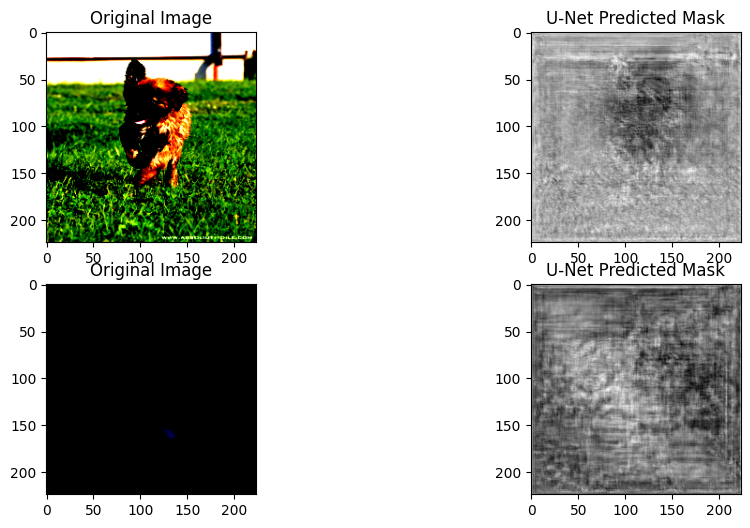

U-Net IoU: 0.9999998807907104


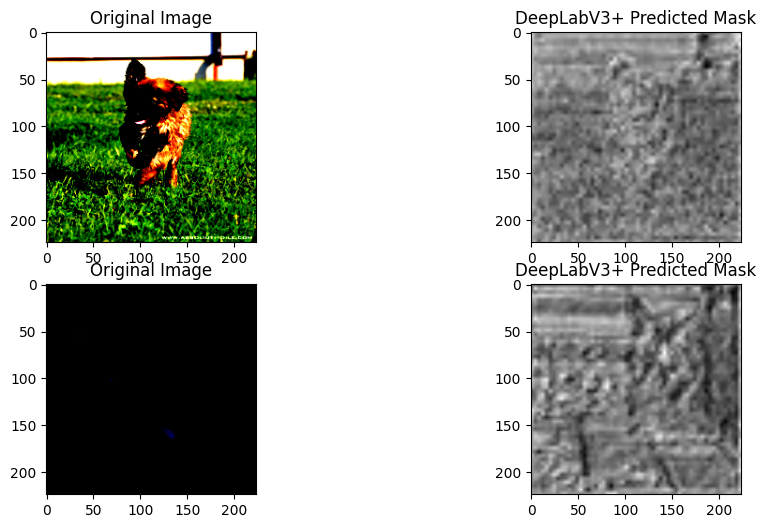

DeepLabV3+ IoU: 0.9999998807907104


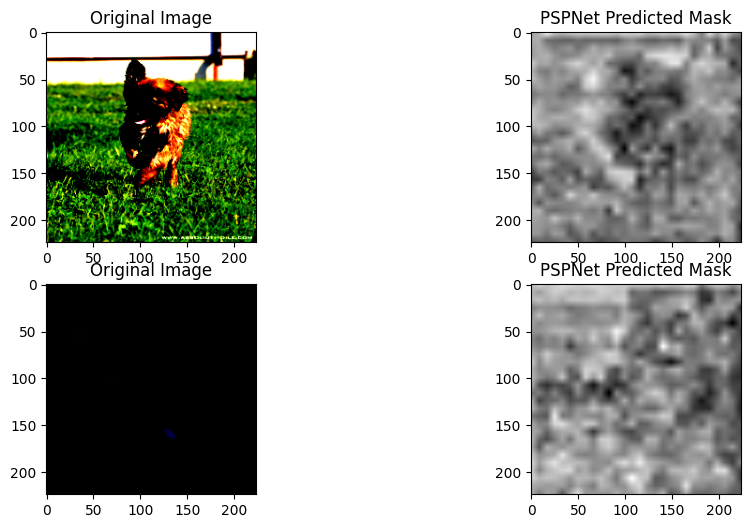

PSPNet IoU: 0.9999998807907104


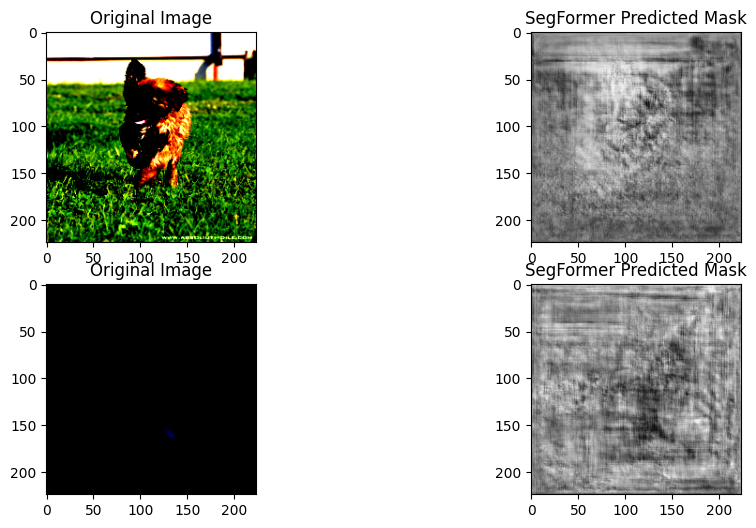

SegFormer IoU: 0.9999998807907104


In [18]:


# Train U-Net
unet_model = build_unet()
train_and_evaluate(unet_model, "U-Net", train_loader, test_loader)


# Train DeepLabV3+
deeplabv3_model = build_deeplabv3()
train_and_evaluate(deeplabv3_model, "DeepLabV3+", train_loader, test_loader) # Added train_loader and test_loader

# Train PSPNet
pspnet_model = build_pspnet()
train_and_evaluate(pspnet_model, "PSPNet", train_loader, test_loader)       # Added train_loader and test_loader

# Train SegFormer
segformer_model = build_segformer()
train_and_evaluate(segformer_model, "SegFormer", train_loader, test_loader) # Added train_loader and test_loader


In [10]:
import numpy as np
from tensorflow.keras.metrics import MeanIoU

In [11]:
num_classes = 37 # Adjust if different
iou_metric = MeanIoU(num_classes=num_classes)

In [13]:
def display_results(model, data_loader, model_name, device, num_images=2):
    # ... (existing code) ...

    # Calculate IoU
    iou_metric.reset_states() # Reset for each batch
    iou_metric.update_state(masks, predictions) # Assuming masks and predictions are properly formatted
    iou_score = iou_metric.result().numpy()

    # Print or display the IoU score
    print(f"{model_name} IoU: {iou_score}")



In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
tanlikesmath_the_oxfordiiit_pet_dataset_path = kagglehub.dataset_download('tanlikesmath/the-oxfordiiit-pet-dataset')

print('Data source import complete.')


Data source import complete.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/basset_hound_94.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/British_Shorthair_126.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Russian_Blue_57.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/chihuahua_29.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/german_shorthaired_151.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Maine_Coon_175.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/wheaten_terrier_61.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/pomeranian_161.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/havanese_87.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Bengal_12.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Bombay_107.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/samoyed_62.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Sia

In [4]:
IMAGE_SIZE = 128
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 30

In [5]:
from PIL import Image
import os
import shutil


image_folder = "/kaggle/input/the-oxfordiiit-pet-dataset/images/"


organized_folder = "/kaggle/working/organized_pet_dataset/"


os.makedirs(organized_folder, exist_ok=True)


valid_extensions = [".jpg", ".jpeg", ".png", ".gif"]

def is_corrupt_image(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()
        return False
    except (IOError, SyntaxError):
        return True


for filename in os.listdir(image_folder):

    if any(filename.endswith(ext) for ext in valid_extensions):
        file_path = os.path.join(image_folder, filename)


        if is_corrupt_image(file_path):
            print(f"Skipping corrupt image: {filename}")
            continue

        class_name = filename.split("_")[0]


        class_dir = os.path.join(organized_folder, class_name)
        os.makedirs(class_dir, exist_ok=True)

        try:

            shutil.copy2(file_path, os.path.join(class_dir, filename))
        except Exception as e:
            print(f"Error copying {filename}: {e}")

print(f"Dataset organized in: {organized_folder}")

Dataset organized in: /kaggle/working/organized_pet_dataset/


In [6]:
import tensorflow as tf

dataset_path = "/kaggle/working/organized_pet_dataset/"

dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels="inferred",
    label_mode="int",
    image_size=(128, 128),
    batch_size=32,
)

# Check the class names
print("Loaded Classes:", dataset.class_names)


Found 7390 files belonging to 35 classes.
Loaded Classes: ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British', 'Egyptian', 'Maine', 'Persian', 'Ragdoll', 'Russian', 'Siamese', 'Sphynx', 'american', 'basset', 'beagle', 'boxer', 'chihuahua', 'english', 'german', 'great', 'havanese', 'japanese', 'keeshond', 'leonberger', 'miniature', 'newfoundland', 'pomeranian', 'pug', 'saint', 'samoyed', 'scottish', 'shiba', 'staffordshire', 'wheaten', 'yorkshire']


In [7]:
class_name = dataset.class_names
class_name

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British',
 'Egyptian',
 'Maine',
 'Persian',
 'Ragdoll',
 'Russian',
 'Siamese',
 'Sphynx',
 'american',
 'basset',
 'beagle',
 'boxer',
 'chihuahua',
 'english',
 'german',
 'great',
 'havanese',
 'japanese',
 'keeshond',
 'leonberger',
 'miniature',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint',
 'samoyed',
 'scottish',
 'shiba',
 'staffordshire',
 'wheaten',
 'yorkshire']

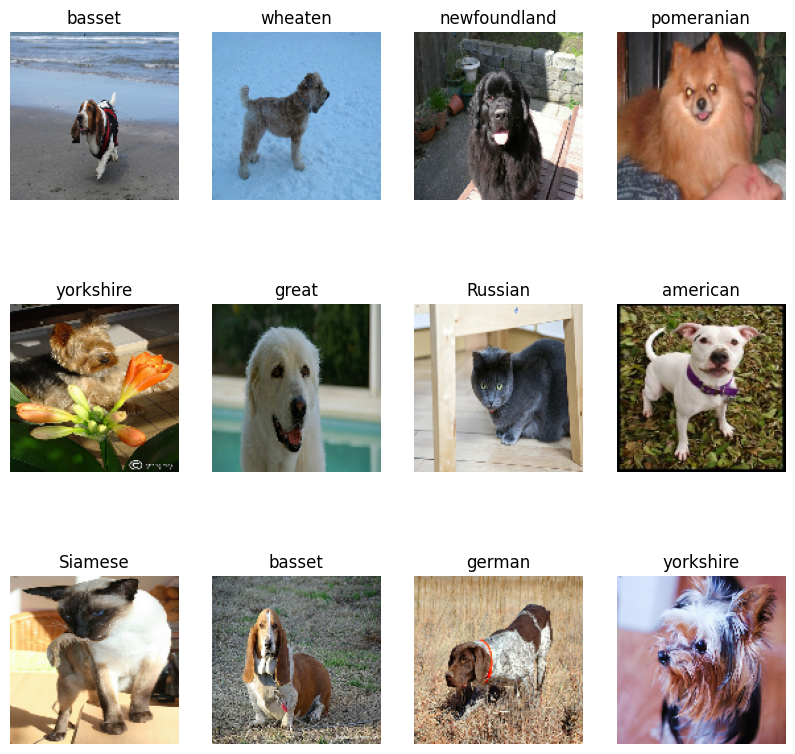

In [8]:


# Get one batch from the dataset
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    num_images = len(image_batch)  # Get the number of images in the batch
    for i in range(min(12, num_images)):  # Ensure we don't exceed the number of images in the batch
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(dataset.class_names[label_batch[i]])  # Use class names from dataset
        plt.axis("off")

plt.show()


In [9]:
train_size = 0.8
len(dataset)*train_size

184.8

In [10]:
train_ds = dataset.take(184)
len(train_ds)

184

In [11]:
test_ds = dataset.skip(184)
len(test_ds)

47

In [12]:
val_size = 0.1
len(dataset)*val_size

23.1

In [13]:
test_ds = test_ds.skip(23)
len(test_ds)

24

In [14]:
def split_dataset(ds, train_split = 0.8, val_split = 0.1, test_split =0.1, shuffle= True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.take(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds



In [15]:
train_ds, val_ds, test_ds = split_dataset(dataset)

In [16]:
len(train_ds)

184

In [17]:
len(test_ds)

24

In [18]:
len(val_ds)

23

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

In [22]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 35

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(35, activation='softmax')

])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │         2,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,219 (473.51 KB)

 Trainable params: 121,219 (473.51 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 123s 668ms/step - accuracy: 0.9217 - loss: 0.2493 - val_accuracy: 0.7916 - val_loss: 1.8552
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 124s 672ms/step - accuracy: 0.8937 - loss: 0.3380 - val_accuracy: 0.7302 - val_loss: 2.1261
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 141s 670ms/step - accuracy: 0.8608 - loss: 0.4762 - val_accuracy: 0.7548 - val_loss: 2.0098
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 123s 668ms/step - accuracy: 0.8559 - loss: 0.4833 - val_accuracy: 0.7616 - val_loss: 2.0066
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 145s 678ms/step - accuracy: 0.8877 - loss: 0.3691 - val_accuracy: 0.7725 - val_loss: 2.0081
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 143s 688ms/step - accuracy: 0.9034 - loss: 0.3033 - val_accuracy: 0.7452 - val_loss: 2.0725
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 122s 665ms/step - accuracy: 0.8921 - loss: 0.3641 - val_accuracy: 0.7847 - val_loss: 1.9623
Epoch 8/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 126s 687ms/step - accuracy: 0.8845 -

In [35]:
model.evaluate(test_ds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.7611 - loss: 2.9463


[2.7176408767700195, 0.7682291865348816]

In [36]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']



Text(0.5, 1.0, 'Training and validation Accuracy')

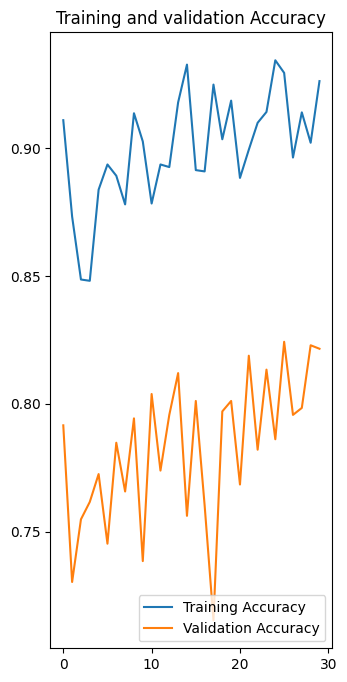

In [40]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title("Training and validation Accuracy")

first image to predict
Actual label: Maine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
predicted label: Maine


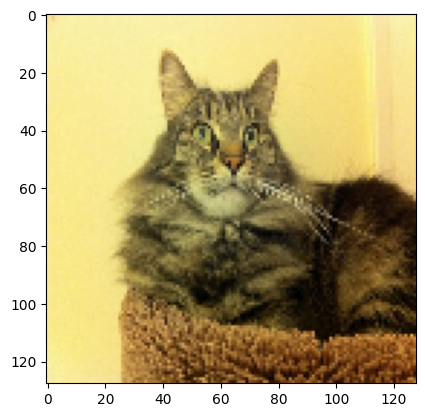

In [41]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_name[first_label])

    batch_images = model.predict(images_batch)
    print('predicted label:', class_name[np.argmax(batch_images[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


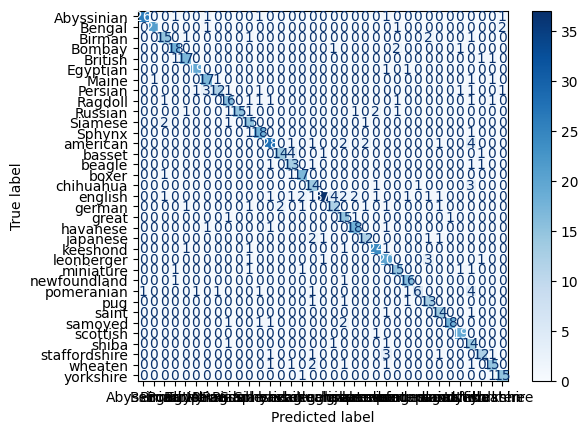

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Pura test dataset se prediction lo
y_true = []
y_pred = []

for images_batch, labels_batch in test_ds:
    preds = model.predict(images_batch)
    y_true.extend(labels_batch.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)
disp.plot(cmap="Blues")
plt.show()

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2 )
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


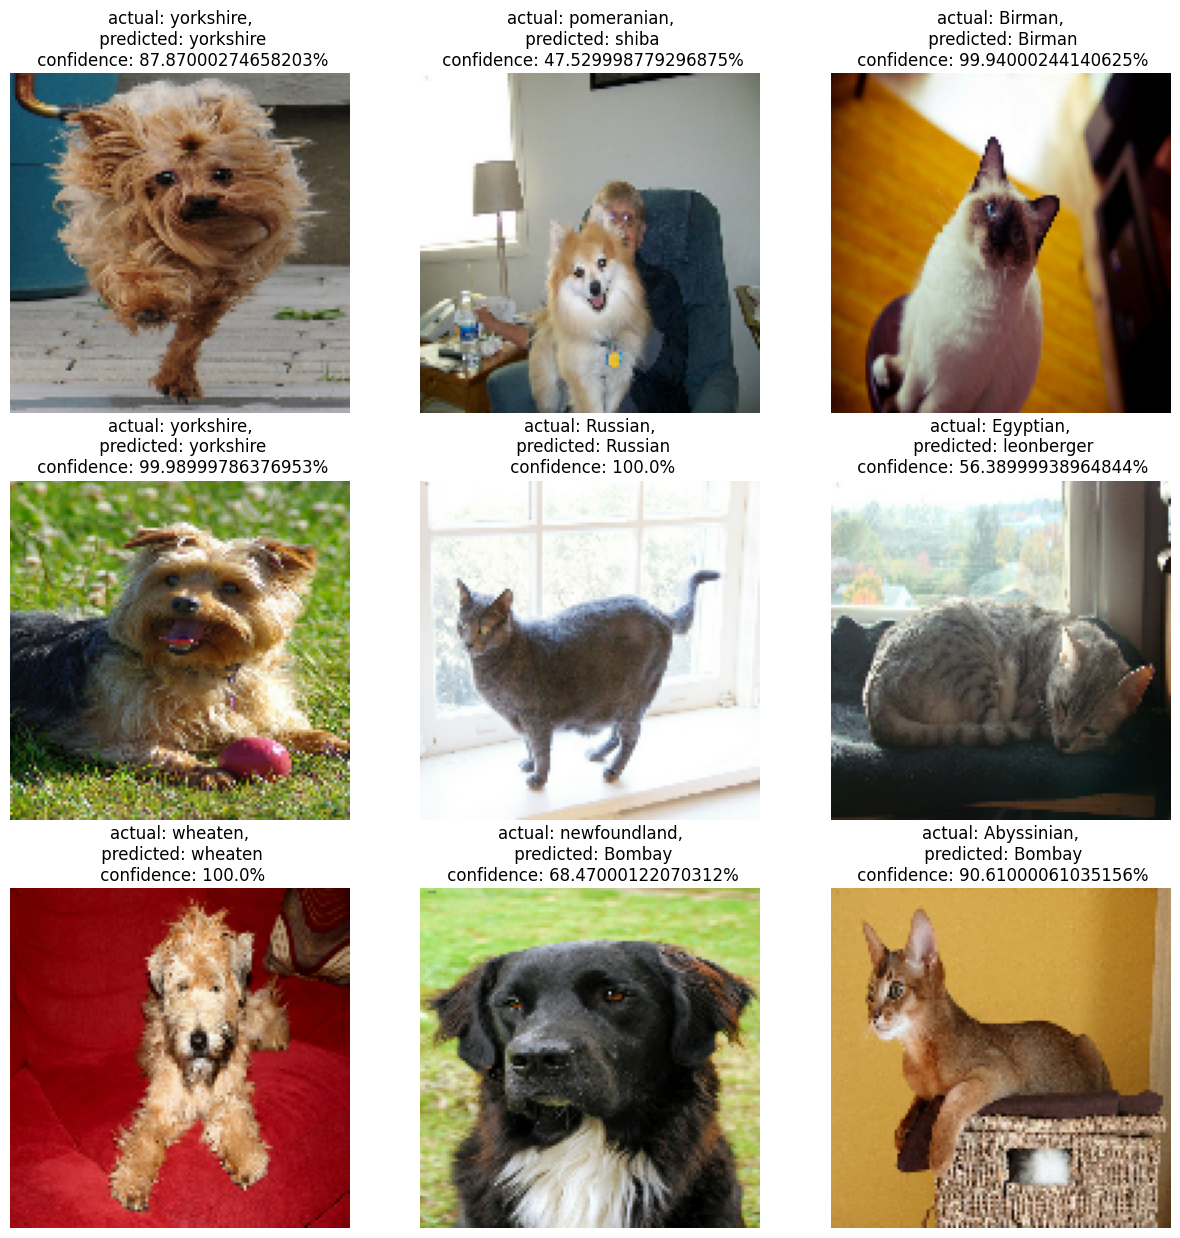

In [44]:
plt.figure(figsize= (15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"actual: {actual_class},\n predicted: {predicted_class}\n confidence: {confidence}%")
        plt.axis('off')

In [45]:
model.save('my_model.h5')

In [46]:
model.evaluate(test_ds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.7504 - loss: 2.8959


[2.7176406383514404, 0.7682291865348816]

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ... (your existing code for predictions) ...

# Assuming y_true and y_pred are your true and predicted labels
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7682291666666666
Precision: 0.7911604002697364
Recall: 0.7682291666666666
F1-Score: 0.770050896310224
